In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate_nn as srnn
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
warnings.filterwarnings('ignore')

In [2]:
L63_data_path = '../data/L63-trajectories'
save_folder = '../data/nn_1_extend_0'
N = 20000
train = np.load(f'{L63_data_path}/train.npy')[:, :N].astype(np.float32)
test = np.load(f'{L63_data_path}/test.npy')[:, :, :1000].astype(np.float32)

learning_rate = 1e-4
drop = 1.
batch_size = 'GD'
log_interval = 100
save_interval = 100
steps = 200000

model = srnn.SurrogateModel_NN(3, 300, save_folder=save_folder)
model.net = torch.load(f'../data/nn_1/nn_0_990000')
model.learn(train, steps=steps, log_interval=log_interval, save_interval=save_interval,\
            learning_rate=learning_rate, batch_size=batch_size)

step: 0    loss: 0.171882     time elapsed=0.0247
step: 100    loss: 0.181462     time elapsed=1.9355
step: 200    loss: 0.171387     time elapsed=3.8361
step: 300    loss: 0.171210     time elapsed=5.7356
step: 400    loss: 0.171134     time elapsed=7.6300
step: 500    loss: 0.171079     time elapsed=9.5237
step: 600    loss: 0.171047     time elapsed=11.4301
step: 700    loss: 0.171012     time elapsed=13.3860
step: 800    loss: 0.181875     time elapsed=15.3262
step: 900    loss: 0.170964     time elapsed=17.2263
step: 1000    loss: 0.578113     time elapsed=19.1413
step: 1100    loss: 0.170953     time elapsed=21.1147
step: 1200    loss: 0.170945     time elapsed=23.1537
step: 1300    loss: 0.170950     time elapsed=25.2559
step: 1400    loss: 0.170949     time elapsed=27.2921
step: 1500    loss: 0.170948     time elapsed=29.2580
step: 1600    loss: 0.170950     time elapsed=31.5471
step: 1700    loss: 0.170947     time elapsed=33.6641
step: 1800    loss: 0.170948     time elapsed=

In [4]:
iters = list(range(0, 200000, 2000))
tau = np.zeros(len(iters))
for i, iter in enumerate(iters):
    model.net = torch.load(f'{model.save_folder}/nn_{iter}')
    tau_f_rmse, tau_f_se, rmse, se = model.compute_tau_f(test[:100], error_threshold=0.05)
    tau[i] = tau_f_se.mean()
    print(i)

Time taken by compute_tau_f is 1.3654 seconds
0
Time taken by compute_tau_f is 1.3248 seconds
1
Time taken by compute_tau_f is 1.3306 seconds
2
Time taken by compute_tau_f is 1.3206 seconds
3
Time taken by compute_tau_f is 1.3259 seconds
4
Time taken by compute_tau_f is 1.3310 seconds
5
Time taken by compute_tau_f is 1.3172 seconds
6
Time taken by compute_tau_f is 1.3173 seconds
7
Time taken by compute_tau_f is 1.3274 seconds
8
Time taken by compute_tau_f is 1.3241 seconds
9
Time taken by compute_tau_f is 1.3254 seconds
10
Time taken by compute_tau_f is 1.3186 seconds
11
Time taken by compute_tau_f is 1.3217 seconds
12
Time taken by compute_tau_f is 1.3290 seconds
13
Time taken by compute_tau_f is 1.3237 seconds
14
Time taken by compute_tau_f is 1.3316 seconds
15
Time taken by compute_tau_f is 1.3172 seconds
16
Time taken by compute_tau_f is 1.3189 seconds
17
Time taken by compute_tau_f is 1.3153 seconds
18
Time taken by compute_tau_f is 1.3563 seconds
19
Time taken by compute_tau_f is

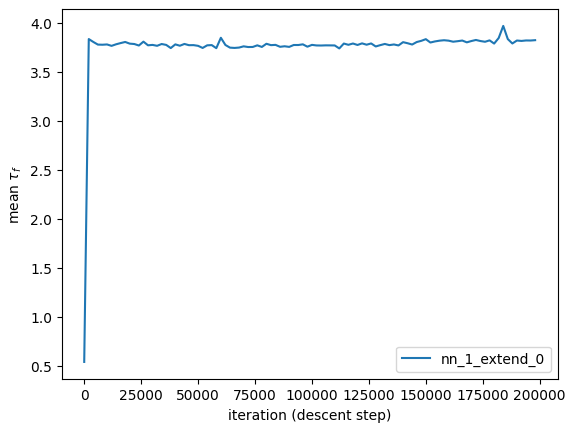

In [5]:
plt.plot(iters, tau, label="nn_1_extend_0")
plt.xlabel('iteration (descent step)')
plt.ylabel(r'mean $\tau_f$')
plt.legend()
plt.savefig(f'{model.save_folder}/iter_vs_mean_tau_f.png')